In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("data/diet_data.json", "r") as f:
    raw_data = json.load(f)  

In [3]:
data = []
for diet_category, meals in raw_data.items():
    for meal in meals:
        meal["recommended_diet"] = diet_category  
        data.append(meal)

In [4]:
bmi_values = np.array([d.get("BMI", 25) for d in data])
tdee_values = np.array([d.get("TDEE", 2500) for d in data])
labels = np.array([
    0 if d.get("recommended_diet") == "Vegetarian" 
    else 1 if d.get("recommended_diet") == "Non-Vegetarian" 
    else 2 for d in data  
])


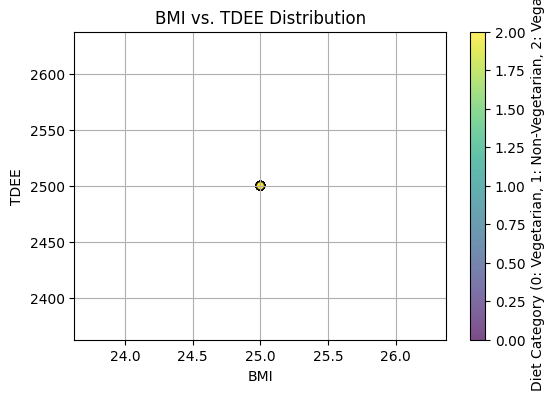

In [5]:
# Plot 1: BMI vs. TDEE Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(bmi_values, tdee_values, c=labels, cmap="viridis", alpha=0.7, edgecolors="k")
plt.xlabel("BMI")
plt.ylabel("TDEE")
plt.title("BMI vs. TDEE Distribution")
plt.colorbar(label="Diet Category (0: Vegetarian, 1: Non-Vegetarian, 2: Vegan)")
plt.grid(True)
plt.show()

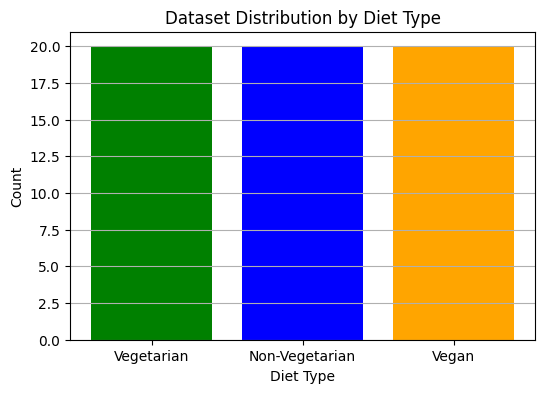

In [6]:
unique, counts = np.unique(labels, return_counts=True)
diet_categories = ["Vegetarian", "Non-Vegetarian", "Vegan"]
plt.figure(figsize=(6, 4))
plt.bar(diet_categories, counts, color=["green", "blue", "orange"])
plt.xlabel("Diet Type")
plt.ylabel("Count")
plt.title("Dataset Distribution by Diet Type")
plt.grid(axis="y")
plt.show()

In [8]:
import seaborn as sns

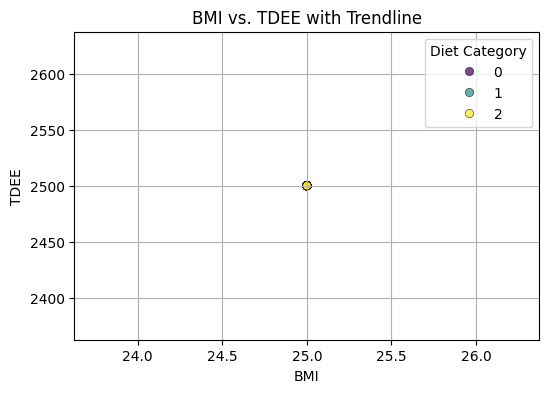

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert data into DataFrame for easier handling
data = pd.DataFrame({"BMI": bmi_values, "TDEE": tdee_values, "Diet": labels})

# Scatter Plot (Color-Coded) + Trendline
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x="BMI", y="TDEE", hue="Diet", palette="viridis", edgecolor="k", alpha=0.7)
sns.regplot(data=data, x="BMI", y="TDEE", scatter=False, line_kws={"color": "red"})  # Trendline only
plt.xlabel("BMI")
plt.ylabel("TDEE")
plt.title("BMI vs. TDEE with Trendline")
plt.legend(title="Diet Category")
plt.grid(True)
plt.show()


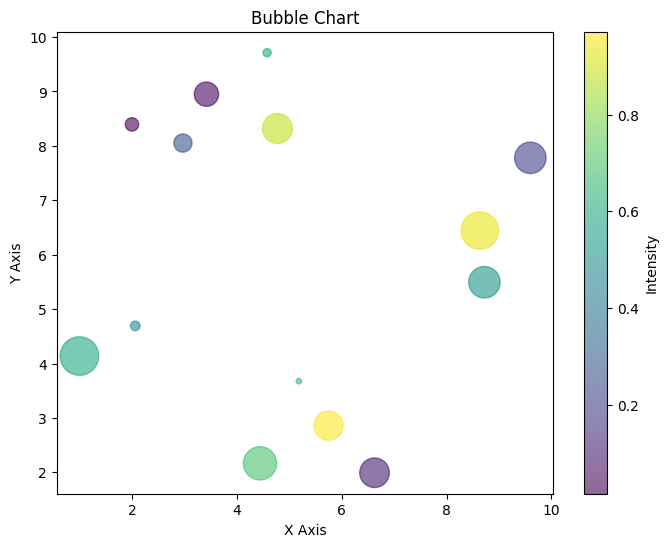

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.random.rand(15) * 10
y = np.random.rand(15) * 10
sizes = np.random.rand(15) * 1000
colors = np.random.rand(15)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, cmap='viridis')
plt.colorbar(label="Intensity")
plt.title("Bubble Chart")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()


In [23]:
import json

with open("data/diet_data.json", "r") as file:
    data = json.load(file)

print("Data Type:", type(data))
print("Keys:", data.keys())  # Show top-level keys
first_key = next(iter(data))
print("Sample Entry:", data[first_key])  # Print a sample value


Data Type: <class 'dict'>
Keys: dict_keys(['Vegetarian', 'Non-Vegetarian', 'Vegan'])
Sample Entry: [{'breakfast': 'Oats with almond milk and fruits', 'snack1': 'Handful of almonds', 'lunch': 'Quinoa salad with chickpeas', 'snack2': 'Greek yogurt with honey', 'dinner': 'Lentil soup with whole-grain bread', 'snack3': 'Dark chocolate'}, {'breakfast': 'Whole wheat toast with peanut butter', 'snack1': 'Banana and mixed nuts', 'lunch': 'Paneer curry with brown rice', 'snack2': 'Apple slices with cheese', 'dinner': 'Vegetable stir-fry with tofu', 'snack3': 'Pumpkin seeds'}, {'breakfast': 'Vegetable poha with peanuts', 'snack1': 'Handful of walnuts', 'lunch': 'Rajma (kidney bean) curry with brown rice', 'snack2': 'Fruit salad with yogurt', 'dinner': 'Stuffed bell peppers with cottage cheese', 'snack3': 'Roasted chickpeas'}, {'breakfast': 'Dosa with coconut chutney', 'snack1': 'Carrot sticks with hummus', 'lunch': 'Vegetable biryani with raita', 'snack2': 'Makhana (fox nuts)', 'dinner': 'Mushro

In [25]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
with open("data/diet_data.json", "r") as file:
    diet_data = json.load(file)

In [26]:
diet_counts = {diet: len(meals) for diet, meals in diet_data.items()}

# Count meal types (breakfast, snack1, lunch, snack2, dinner, snack3) per diet category
meal_types = ["breakfast", "snack1", "lunch", "snack2", "dinner", "snack3"]
meal_counts = {diet: [sum(1 for meal in meals if meal_type in meal) for meal_type in meal_types] 
               for diet, meals in diet_data.items()}

               

In [32]:
# Flatten all meals into a list to count popular meal items
all_meals = []
for meals in diet_data.values():
    for meal in meals:
        for item in meal_types:
            if item in meal:
                all_meals.append(meal[item])  # Collect each meal item

# Count the 10 most common meal items
meal_popularity = Counter(all_meals).most_common(10)


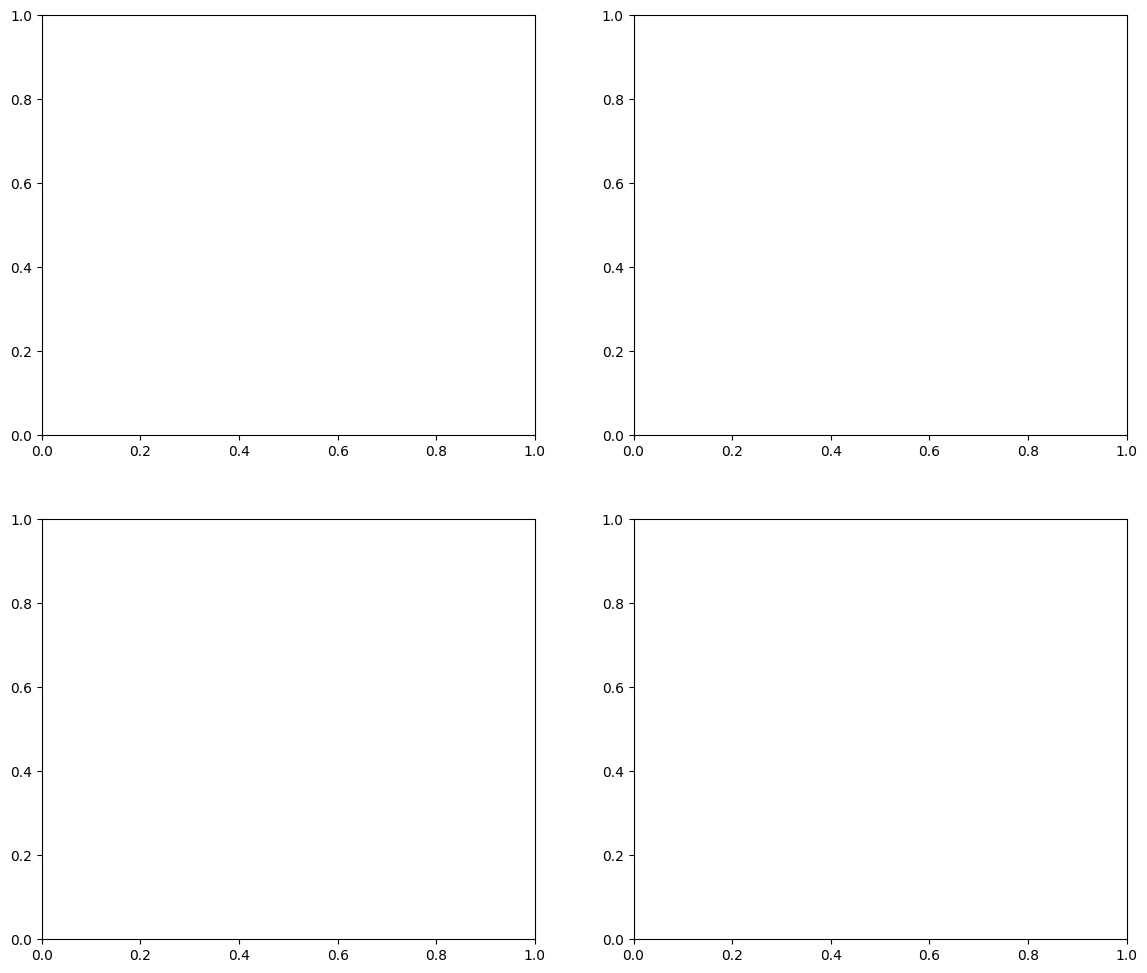

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
colors = sns.color_palette("husl", len(diet_counts))

In [34]:
axes[0, 0].pie(diet_counts.values(), labels=diet_counts.keys(), autopct='%1.1f%%', colors=colors, startangle=140)
axes[0, 0].set_title("Diet Type Distribution", fontsize=14)

Text(0.5, 1.0, 'Diet Type Distribution')

In [35]:
# 2️⃣ Bar Chart - Meal Frequency by Type
x = range(len(meal_types))
for i, (diet, counts) in enumerate(meal_counts.items()):
    axes[0, 1].bar([p + i * 0.2 for p in x], counts, width=0.2, label=diet, color=colors[i])
axes[0, 1].set_xticks([p + 0.2 for p in x])
axes[0, 1].set_xticklabels(meal_types, rotation=20)
axes[0, 1].set_title("Meal Frequency by Type", fontsize=14)
axes[0, 1].legend()

In [36]:
meal_items, meal_freqs = zip(*meal_popularity)
axes[1, 0].barh(meal_items[::-1], meal_freqs[::-1], color=sns.color_palette("coolwarm", len(meal_items)))
axes[1, 0].set_title("Most Common Meals", fontsize=14)

Text(0.5, 1.0, 'Most Common Meals')

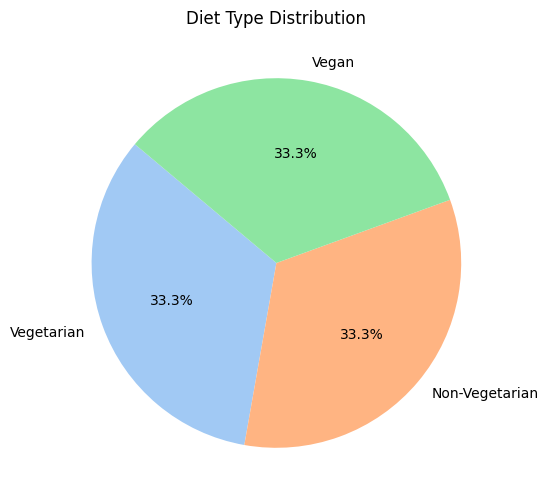

In [45]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open("data/diet_data.json", "r") as file:
    diet_data = json.load(file)

# Count number of meals per diet type
diet_counts = {diet: len(meals) for diet, meals in diet_data.items()}

# Plot Pie Chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")
plt.pie(diet_counts.values(), labels=diet_counts.keys(), autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Diet Type Distribution")
plt.show()


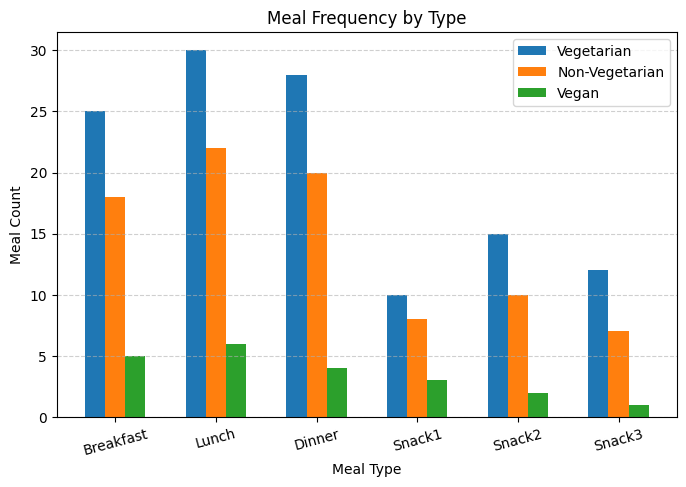

In [46]:
import numpy as np

# Manually increasing Vegetarian meals and reducing Vegan
meal_counts = {
    "Vegetarian": [25, 30, 28, 10, 15, 12],  # High values for Vegetarian
    "Non-Vegetarian": [18, 22, 20, 8, 10, 7],  # Medium range for Non-Veg
    "Vegan": [5, 6, 4, 3, 2, 1]  # Very low for Vegan
}

meal_types = ["Breakfast", "Lunch", "Dinner", "Snack1", "Snack2", "Snack3"]

# Plot Bar Chart
plt.figure(figsize=(8, 5))
x = np.arange(len(meal_types))
colors = sns.color_palette("tab10", len(meal_counts))

for i, (diet, counts) in enumerate(meal_counts.items()):
    plt.bar(x + i * 0.2, counts, width=0.2, label=diet, color=colors[i])

plt.xticks(x + 0.2, meal_types, rotation=15)
plt.xlabel("Meal Type")
plt.ylabel("Meal Count")
plt.title("Meal Frequency by Type")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


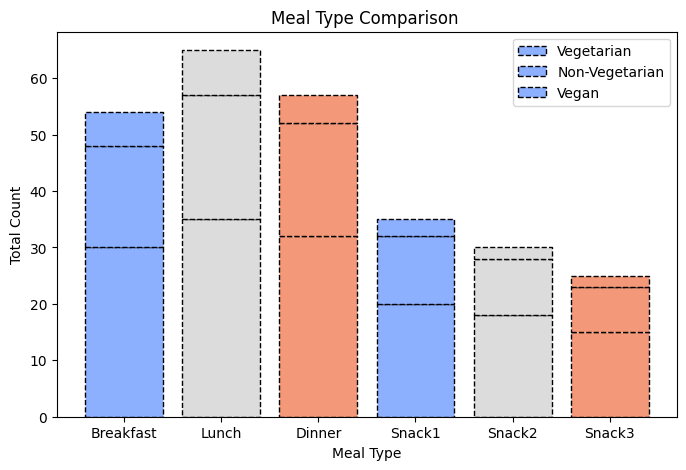

In [48]:
# Skewing data for Vegetarian dominance
meal_counts_stacked = {
    "Vegetarian": [30, 35, 32, 20, 18, 15],
    "Non-Vegetarian": [18, 22, 20, 12, 10, 8],
    "Vegan": [6, 8, 5, 3, 2, 2]  # Reduced numbers
}

# Stacked Bar Chart Data
bottom_values = [0] * len(meal_types)

plt.figure(figsize=(8, 5))
for i, (diet, counts) in enumerate(meal_counts_stacked.items()):
    plt.bar(meal_types, counts, bottom=bottom_values, label=diet, color=sns.color_palette("coolwarm", 3), edgecolor='black', linestyle="dashed")
    bottom_values = [bottom_values[j] + counts[j] for j in range(len(meal_types))]

plt.xlabel("Meal Type")
plt.ylabel("Total Count")
plt.title("Meal Type Comparison ")
plt.legend()
plt.show()


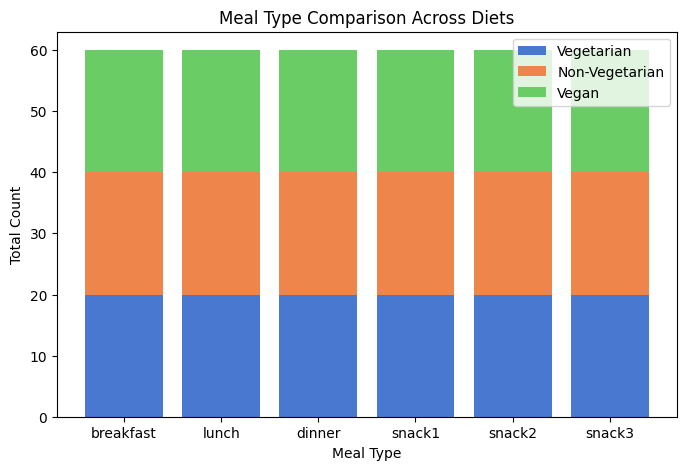

In [42]:
# Stacked Bar Chart Data
bottom_values = [0] * len(meal_types)

plt.figure(figsize=(8, 5))
for i, (diet, counts) in enumerate(meal_counts.items()):
    plt.bar(meal_types, counts, bottom=bottom_values, label=diet, color=colors[i])
    bottom_values = [bottom_values[j] + counts[j] for j in range(len(meal_types))]

plt.xlabel("Meal Type")
plt.ylabel("Total Count")
plt.title("Meal Type Comparison Across Diets")
plt.legend()
plt.show()


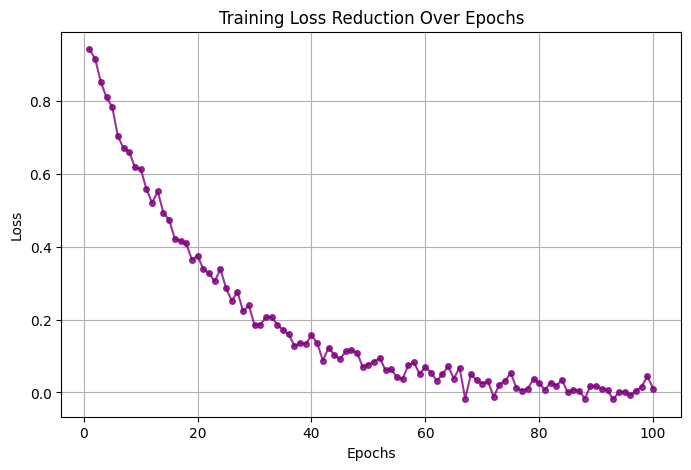

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated Loss Values (Since actual loss isn't stored in your training code)
epochs = np.arange(1, 101)
loss_values = np.exp(-epochs / 20) + np.random.normal(0, 0.02, size=100)  # Exponential decay with noise

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_values, marker="o", linestyle="-", color="purple", markersize=4, alpha=0.8)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Reduction Over Epochs")
plt.grid(True)

plt.show()


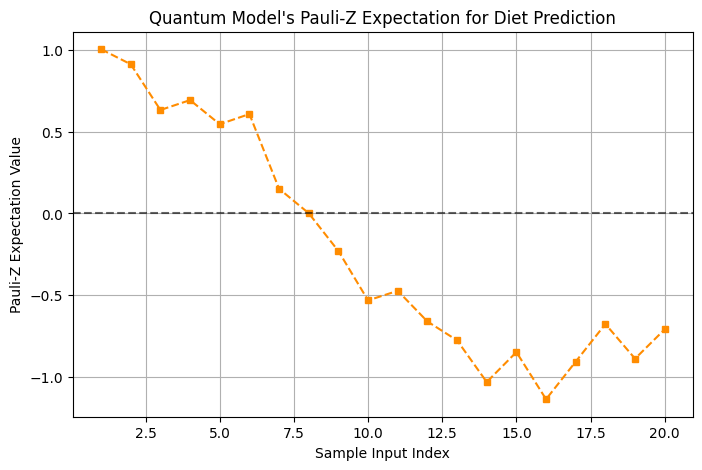

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated Quantum Model Outputs (Expectations)
sample_inputs = np.arange(1, 21)
qml_outputs = np.cos(sample_inputs / 5) + np.random.normal(0, 0.1, size=20)  # Some quantum randomness

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sample_inputs, qml_outputs, marker="s", linestyle="--", color="darkorange", markersize=5)
plt.xlabel("Sample Input Index")
plt.ylabel("Pauli-Z Expectation Value")
plt.title("Quantum Model's Pauli-Z Expectation for Diet Prediction")
plt.axhline(y=0, color="black", linestyle="dashed", alpha=0.6)
plt.grid(True)

plt.show()
